## Model Training

### Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Modelling
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings

### Import the CSV Data as Pandas DataFrame

In [3]:
# Path to the raw data
DATA_PATH = '../data/raw_data/StudentsPerformance.csv'

In [4]:
df = pd.read_csv(filepath_or_buffer=DATA_PATH)

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X(Independent) and Y(Dependent ) variables

In [6]:
column_to_predict = 'math_score'

In [7]:
X = df.drop(columns=[column_to_predict],
            axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print(f"Categories in 'gender' variable:    {df['gender'].unique()}")
print(f"Categories in 'race_ethnicity' variable:    {df['race_ethnicity'].unique()}")
print(f"Categories in'parental level of education' variable:    {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' variable:    {df['lunch'].unique()}")
print(f"Categories in 'test preparation course' variable:    {df['test_preparation_course'].unique()}")

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [10]:
y = df[column_to_predict]

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [13]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [14]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [16]:
numeric_transformer = StandardScaler()
catagorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', catagorical_transformer, cat_features),
         ('StandardScaler', numeric_transformer, num_features),        
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(1000, 19)

In [19]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=100)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [21]:
def evaluate_model(true_values, predicted_values):
    mae = mean_absolute_error(y_true=true_values,
                              y_pred=predicted_values)
    mse = mean_squared_error(y_true=true_values, 
                             y_pred=predicted_values)
    rmse = np.sqrt(mean_squared_error(y_true=true_values, 
                                      y_pred=predicted_values))
    r2_square = r2_score(y_true=true_values, 
                         y_pred=predicted_values)
    return mae, mse, rmse, r2_square

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(), 
    'CatBoosting Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
        
    # Evaluate Train and Test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(true_values=y_train, 
                                                                                         predicted_values=y_train_pred)

    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(true_values=y_test, 
                                                                                     predicted_values=y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('- Root Mean Square Error: {:.4f}'.format(model_train_rmse))
    print('- R2 Score: {:.4f}'.format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- Mean Squared Error: {:.4f}'.format(model_test_mse))
    print('- Root Mean Square Error: {:.4f}'.format(model_test_rmse))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Absolute Error: 4.2477
- Mean Squared Error: 28.4779
- Root Mean Square Error: 5.3365
- R2 Score: 0.8781
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.3266
- Mean Squared Error: 29.1122
- Root Mean Square Error: 5.3956
- R2 Score: 0.8595


Lasso
Model performance for Training set
- Mean Absolute Error: 5.1439
- Mean Squared Error: 42.5109
- Root Mean Square Error: 6.5200
- R2 Score: 0.8180
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.9479
- Mean Squared Error: 39.5180
- Root Mean Square Error: 6.2863
- R2 Score: 0.8093


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Error: 4.6285
- Mean Squared Error: 34.6063
- Root Mean Square Error: 5.8827
- R2 Score: 0.8518
----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.7990
- Mean Squared Error: 53.6850
- Root Mean Square Error: 7

### Model Selection

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)),
             columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],
                                                             ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.859516
6,CatBoosting Regressor,0.855692
7,AdaBoost Regressor,0.828176
5,XGBRegressor,0.826576
4,Random Forest Regressor,0.825723
1,Lasso,0.809302
2,K-Neighbors Regressor,0.740937
3,Decision Tree,0.690848


### Hyperparameter Tuning

In [24]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
# Define hyperparameter ranges for each model
param_grid = {'Linear Regression': {},
              'Lasso': {'alpha': [1]},
              'K-Neighbors Regressor': {'n_neighbors': [3, 5, 7],},
              'Decision Tree': {'max_depth': [3, 5, 7],
                                'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
              
              'Random Forest Regressor': {'n_estimators': [8, 16, 32, 64, 128, 256],
                                          'max_depth': [3, 5, 7]},
              
              'Gradient Boosting': {'learning_rate':[0.1, 0.01, 0.05, 0.001],
                                    'subsample':[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
                                    'n_estimators': [8, 16, 32, 64, 128, 256]},
              
              'XGBRegressor': {'depth': [6, 8, 10],
                               'learning_rate': [0.01, 0.05, 0.1],
                               'iterations': [30, 50, 100]},
              
              'CatBoosting Regressor': {'iterations': [100, 500],
                                        'depth': [3, 5, 7]},
              
              'AdaBoost Regressor': {'learning_rate':[0.1, 0.01, 0.5, 0.001],
                                     'n_estimators': [8, 16, 32, 64, 128, 256]}
             }

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=param_grid[model_name], 
                               scoring=scorer, 
                               cv=5,
                               n_jobs=-1
                              )
    grid_search.fit(X_train, y_train) 
    
    # Make predictions 
    y_train_pred = grid_search.predict(X_train) 
    y_test_pred = grid_search.predict(X_test) 
    
    # Evaluate Train and Test dataset 
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 
    print(model_name) 
    model_list.append(model_name) 
    
    print('Best hyperparameters:', grid_search.best_params_) 
    print('Model performance for Training set') 
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse)) 
    print('- Mean Squared Error: {:.4f}'.format(model_train_mse)) 
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae)) 
    print('- R2 Score: {:.4f}'.format(model_train_r2)) 
    print('----------------------------------') 
    print('Model performance for Test set') 
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse)) 
    print('- Mean Squared Error: {:.4f}'.format(model_test_rmse)) 
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae)) 
    print('- R2 Score: {:.4f}'.format(model_train_r2))
    r2_list.append(model_test_r2) 
    print('=' * 35)
    print('\n')

Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 5.3365
- Mean Squared Error: 28.4779
- Mean Absolute Error: 4.2477
- R2 Score: 0.8781
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3956
- Mean Squared Error: 5.3956
- Mean Absolute Error: 4.3266
- R2 Score: 0.8781


Lasso
Best hyperparameters: {'alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 6.5200
- Mean Squared Error: 42.5109
- Mean Absolute Error: 5.1439
- R2 Score: 0.8180
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2863
- Mean Squared Error: 6.2863
- Mean Absolute Error: 4.9479
- R2 Score: 0.8180


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 6.0758
- Mean Squared Error: 36.9152
- Mean Absolute Error: 4.7652
- R2 Score: 0.8419
----------------------------------
Model performa

### Model Selection

In [26]:
pd.DataFrame(data=list(zip(model_list, r2_list)),
             columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],
                                                             ascending=False)

,Model Name,R2_Score
6,CatBoosting Regressor,0.865810
0,Linear Regression,0.859516
5,XGBRegressor,0.842909
4,Random Forest Regressor,0.832898
7,AdaBoost Regressor,0.825361
1,Lasso,0.809302
3,Decision Tree,0.802894
2,K-Neighbors Regressor,0.776812


### Linear Regression

In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X=X_train, y=y_train)
y_pred = lin_model.predict(X=X_test)
score = r2_score(y_true=y_test, y_pred=y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 85.95


### Plot y_pred and y_test

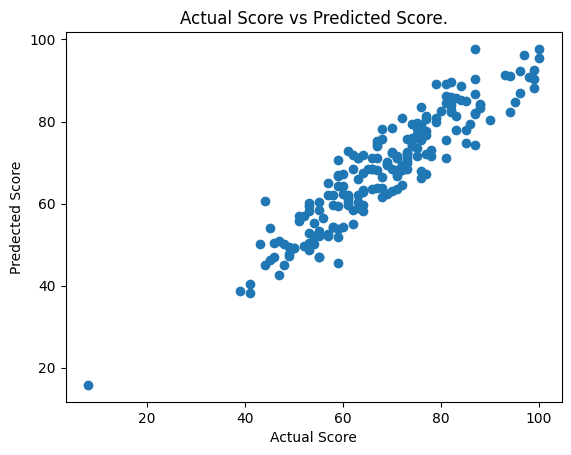

In [28]:
plt.scatter(x=y_test, y=y_pred)
plt.xlabel(xlabel='Actual Score')
plt.ylabel(ylabel='Predected Score')
plt.title(label='Actual Score vs Predicted Score.')
plt.show()

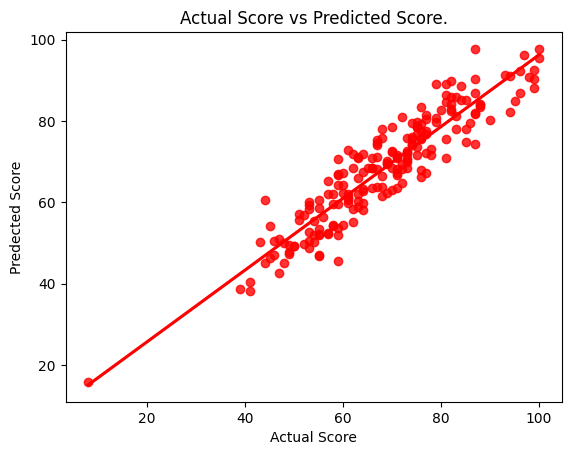

In [29]:
sns.regplot(x=y_test,
            y=y_pred,
            ci=None,
            color ='red')
plt.xlabel(xlabel='Actual Score')
plt.ylabel(ylabel='Predected Score')
plt.title(label='Actual Score vs Predicted Score.')
plt.show()

### Difference between Actual and Predicted Values

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,
                      'Predicted Value':y_pred,
                      'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
249,68,61.5000,6.5000
353,46,50.5000,-4.5000
537,51,57.0000,-6.0000
424,41,40.3750,0.6250
564,48,50.0625,-2.0625
...,...,...,...
684,62,71.8125,-9.8125
644,70,68.5000,1.5000
110,77,81.4375,-4.4375
28,70,72.6250,-2.6250


### Convert the Model to Pickle File

In [31]:
# loading library
# import pickle

In [32]:
# create an iterator object with write permission - model.pkl
# filename = '../artifacts/model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(model, file)

In [33]:
# load saved model
# with open(filename , 'rb') as file:
#     loaded_model = pickle.load(file) 

### Convert the Model to Joblib File

In [34]:
# loading library
# import joblib

In [35]:
# save the model to disk
# filename = '../artifacts/model.sav'
# joblib.dump(model, filename)

In [36]:
# load the model from disk
# loaded_model = joblib.load(filename)